In [3]:
from l2_error import *
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

# Collect three implementations for computing l2 error.

In [19]:
# This function assumes that all qubits are to be measured for the distribution.
def probabilities_from_circuit(qc):        
    state = Statevector.from_instruction(qc) 
    return state.probabilities()

def three_l2_errors_from_probabilities(p, x):
    error_2 = idnm_l2_error(jnp.array(p), jnp.array(x))
    error_1 = tnemoz_l2_error(p, x)
    error_0 = l2_error(p, x)
    
    print(f'Error by method 0 (QuantumSage):{error_0}')
    print(f'Error by method 1 (tnemoz):{error_1}')
    print(f'Error by method 2 (idnm):{error_2}')
    
def three_l2_errors_from_circuit(qasm_str, x, reverse_bits=True):
    
    qc = QuantumCircuit.from_qasm_str(qasm_str)
    if reverse_bits:
        qc = qc.reverse_bits()
        
    print(f'Circuit depth is {qc.depth()}\n')
    p = probabilities_from_circuit(qc)
    three_l2_errors_from_probabilities(p, x)
    

# Sample computation

Define a sample circuit and discretization.

In [20]:
num_qubits = 5
qc = QuantumCircuit(num_qubits)
for i in range(num_qubits):
    qc.h(i)
    
qasm = qc.qasm()
x = np.linspace(0.5, 1.5, 2**num_qubits+1)

Report errors computed by three slighly different methods.

Circuit depth is 1

Error by method 0 (QuantumSage):1.3520420550300756
Error by method 1 (tnemoz):1.352057439438687
Error by method 2 (idnm):1.3520573377609253


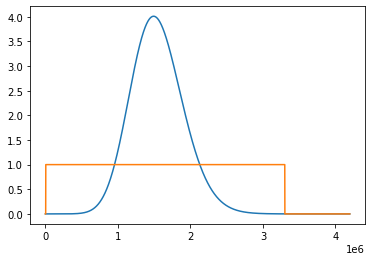

In [21]:
three_l2_errors_from_circuit(qasm, x)